전체 ner_data 개수: 90000

유일한 총 문장 수 : 88703
반복해서 나타나는 문장의 수: 288

중복 최대 개수: 116
중복 최소 개수: 1
중복 평균 개수: 1.01
중복 표준편차: 0.92
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x193f2d195c8>,
 'caps': [<matplotlib.lines.Line2D at 0x193f2d19f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x193f2d11e48>],
 'medians': [<matplotlib.lines.Line2D at 0x193f2d20b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x193f2d19fc8>],
 'means': [<matplotlib.lines.Line2D at 0x193f2d20a08>]}

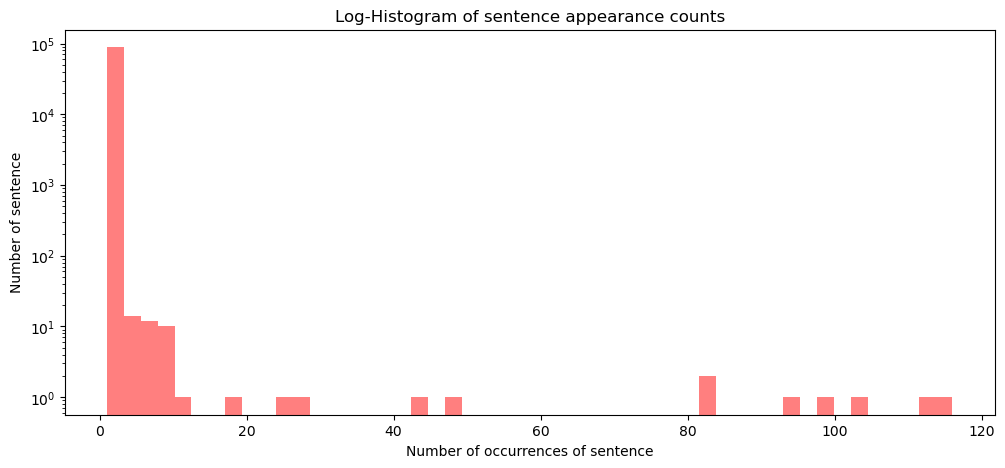

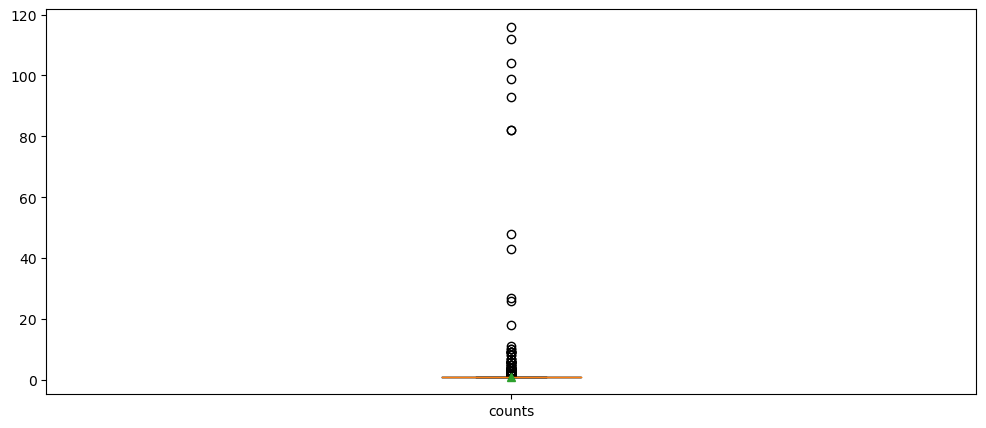

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

# 데이터 불러오기
DATA_IN_PATH = 'data_in/KOR'
DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, "NER", "train.tsv")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, "NER", "test.tsv")
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, "NER", "label.txt")

"""
pd.read_csv()로 읽어오면 따옴표 인식 이슈!
--> 학습 데이터 81,000개에서 74,000개로 감소
--> 일반적인 tsv파일 한줄씩 읽어오는 코드 이용
"""
def read_file(input_path):
    """Read tsv file, and return words and label as list"""
    with open(input_path, "r", encoding="utf-8") as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split("\t")
            sentences.append(split_line[0])
            labels.append(split_line[1])
        return sentences, labels
    
train_sentences, train_labels = read_file(DATA_TRAIN_PATH)
test_sentences, test_labels = read_file(DATA_TEST_PATH)
ner_sentences = train_sentences + test_sentences # 총 90,000 문장
ner_labels = train_labels + test_labels  # 총 90,000 레이블

ner_dict = {"sentence": ner_sentences, "label": ner_labels}
ner_df = pd.DataFrame(ner_dict)

print('전체 ner_data 개수: {}'.format(len(ner_df)))
print()

""" 문장 중복 여부 확인 """
train_set = pd.Series(ner_df["sentence"].tolist())
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))
print()

# 문장 중복 빈도에 따른 문장 개수 히스토그램 
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

0         18
1         39
2         60
3        125
4         18
        ... 
89995     19
89996     62
89997     22
89998     54
89999     50
Length: 90000, dtype: int64

문장 길이 최대 값: 1162
문장 길이 평균 값: 50.90
문장 길이 표준편차: 34.15
문장 길이 중간 값: 43.0
문장 길이 제 1 사분위: 29.0
문장 길이 제 3 사분위: 63.0

문장 단어 개수 최대 값: 175
문장 단어 개수 평균 값: 11.82
문장 단어 개수 표준편차: 7.03
문장 단어 개수 중간 값: 10.0
문장 단어 개수 제 1 사분위: 7.0
문장 단어 개수 제 3 사분위: 15.0
문장 단어 개수 99 퍼센트: 35.0



{'whiskers': [<matplotlib.lines.Line2D at 0x193f2dedec8>,
 'caps': [<matplotlib.lines.Line2D at 0x193f2de0348>,
 'boxes': [<matplotlib.lines.Line2D at 0x193f2ded688>],
 'medians': [<matplotlib.lines.Line2D at 0x193f2df7788>],
 'fliers': [<matplotlib.lines.Line2D at 0x193f2df2948>],
 'means': [<matplotlib.lines.Line2D at 0x193f2df7dc8>]}

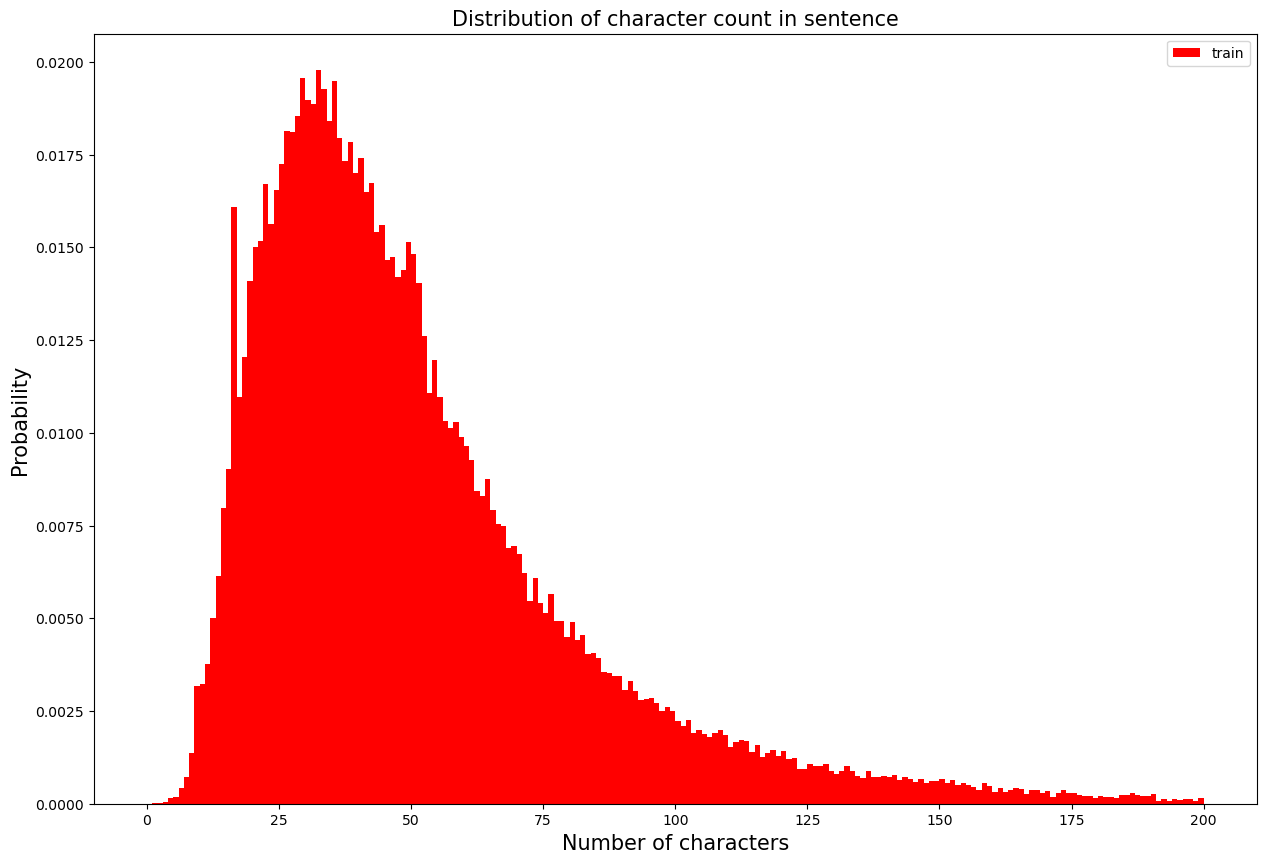

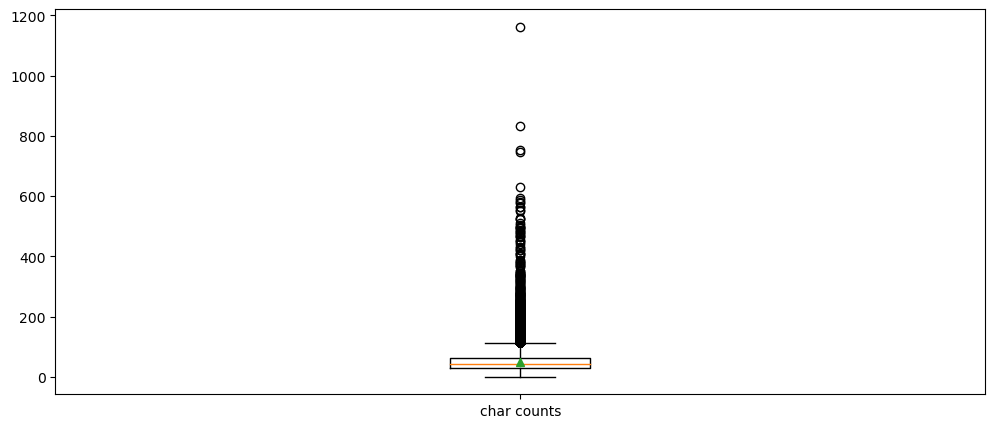

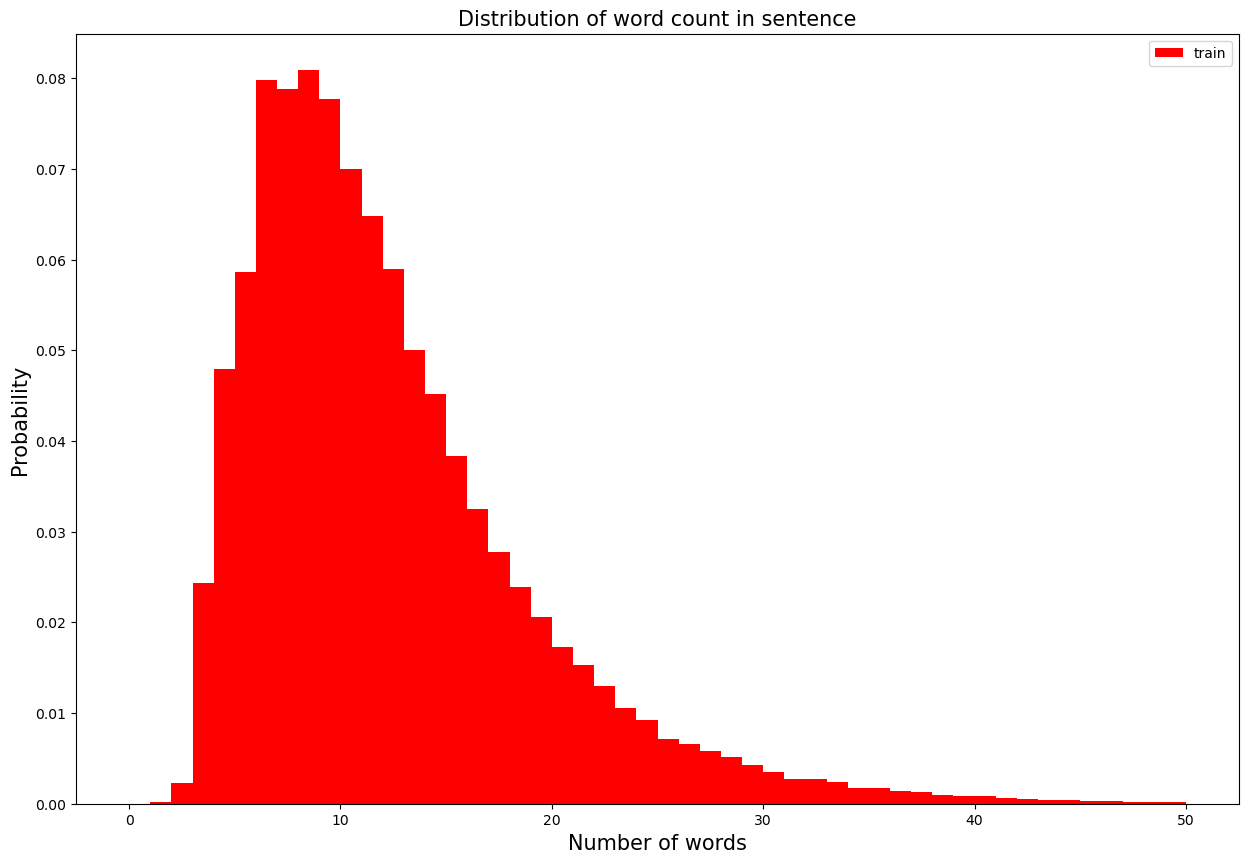

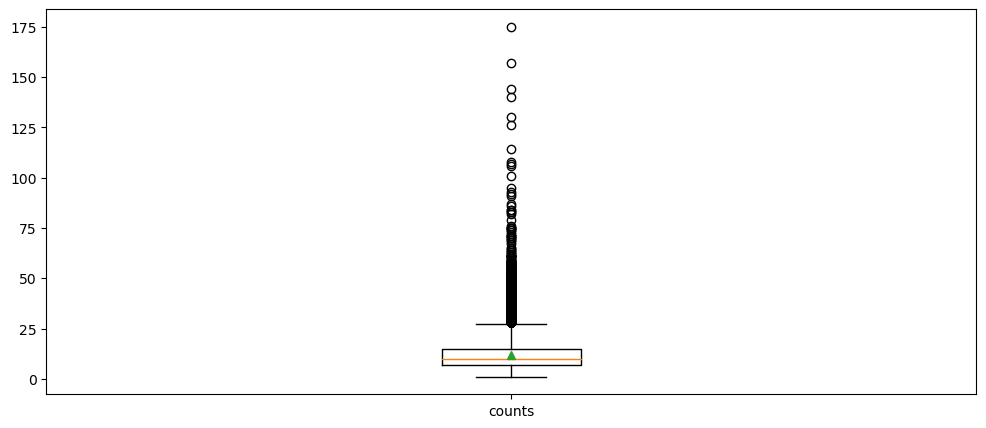

In [2]:
""" 음절 단위 문장 길이 """
train_length = train_set.apply(len)
print(train_length)
print()

print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))
print()

plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)


plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

""" 어절 단위 문장 길이 """
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))
print()

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [3]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 2.24%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 84.92%
첫 글자가 대문자 인 문장: 2.87%
대문자가있는 문장: 16.65%
숫자가있는 문장: 41.61%


# 버트 토크나이징 결과 확인

문장 tokens 개수 최대 값: 850
문장 tokens 개수 평균 값: 33.62
문장 tokens 개수 표준편차: 22.76
문장 tokens 개수 중간 값: 28.0
문장 tokens 개수 제 1 사분위: 19.0
문장 tokens 개수 제 3 사분위: 41.0
문장 tokens 개수 99 퍼센트: 111.0



{'whiskers': [<matplotlib.lines.Line2D at 0x193f358eac8>,
 'caps': [<matplotlib.lines.Line2D at 0x193f3580b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x193f358e288>],
 'medians': [<matplotlib.lines.Line2D at 0x193f3599288>],
 'fliers': [<matplotlib.lines.Line2D at 0x193f3593548>],
 'means': [<matplotlib.lines.Line2D at 0x193f3593d48>]}

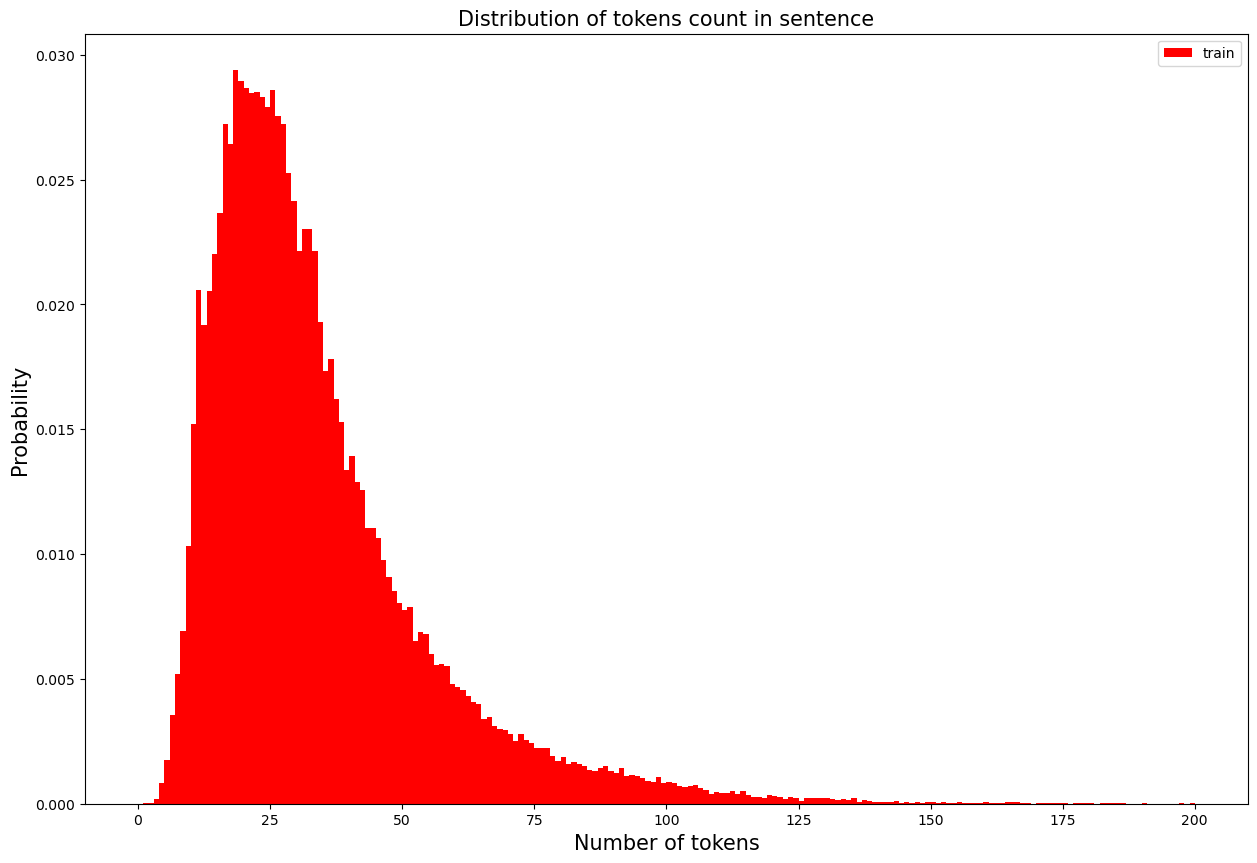

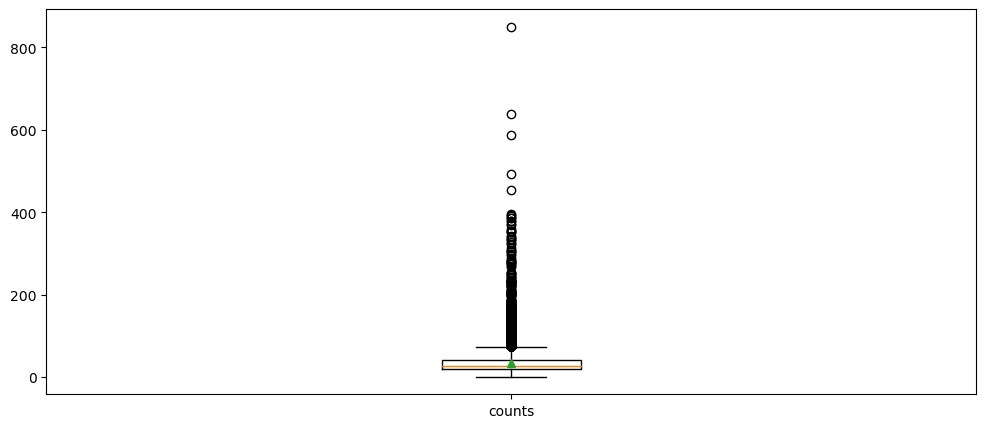

In [4]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))
# 111 (버트 토크나이징의 결과 토큰 개수의 99퍼센트 값)--> MAX LEN으로 이용
# NER 문제에서는, 각 토큰 하나하나가 중요함! 
# - 모든 토큰 시퀀스값에 대한 레이블(개체명)을 예측해야 하기 때문에
# - "모든 은닉 벡터 값"을 활용한다.
# - 감정분류,유사도분류 등은 마지막 은닉벡터값만 사용
print()

plt.figure(figsize=(12, 5))
plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)